In [2]:
%cd /content/drive/MyDrive/0.CV/0.Planogram_Compliance/
# !git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

[Errno 2] No such file or directory: '/content/drive/MyDrive/0.CV/0.Planogram_Compliance/'
/home/abhi/streamlit-app
/home/abhi/streamlit-app/yolov5


In [2]:

%pip install -q -r requirements.txt  # install dependencies
!pip install --upgrade pandas 
import torch
from IPython.display import Image, clear_output  # to display images

# clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

     |████████████████████████████████| 3.1 MB 10.5 MB/s 
     |████████████████████████████████| 596 kB 70.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 11.3 MB 14.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


Setup complete. Using torch 1.9.0+cu111 (CPU)


In [3]:
names = ['Bottle,100PLUS ACTIVE 1.5L','Bottle,100PLUS ACTIVE 500ML','Bottle,100PLUS LEMON LIME 1.5L',
 'Bottle,100PLUS ORANGE 500ML', 'Bottle,100PLUS ORIGINAL 1.5L',
 'Bottle,100PLUS TANGY ORANGE 1.5L','Bottle,100PLUS ZERO 1.5L', 'Bottle,100PLUS ZERO 500ML','Packet,F:M MAGNOLIA CHOC 1L',
 'Bottle,F&N GINGER ADE 1.5L','Bottle,F&N GRAPE 1.5L','Bottle,F&N ICE CREAM SODA 1.5L','Bottle,F&N LYCHEE PEAR 1.5L','Bottle,F&N ORANGE 1.5L',
 'Bottle,F&N PINEAPPLE PET 1.5L','Bottle,F&N SARSI 1.5L','Bottle,F&N SS ICE LEM TEA RS 500ML','Bottle,F&N SS ICE LEMON TEA RS 1.5L','Bottle,F&N SS ICE LEMON TEA 1.5L','Bottle,F&N SS ICE LEMON TEA 500ML',
 'Bottle,F&N SS ICE PEACH TEA 1.5L','Bottle,SS ICE LEMON GT 1.48L','Bottle,SS WHITE CHRYS TEA 1.48L','Packet,FARMHOUSE FRESH MILK 1L FNDM','Packet,FARMHOUSE PLAIN LF 1L',
 'Packet,PURA FRESH MILK 1L FS','Packet,NUTRISOY REG NO SUGAR ADDED 1L','Packet,NUTRISOY PLAIN 475ML','Packet,NUTRISOY PLAIN 1L','Packet,NUTRISOY OMEGA RD SUGAR 1L','Packet,NUTRISOY OMEGA NSA 1L',
 'Packet,NUTRISOY ALMOND 1L','Packet,MAGNOLIA FRESH MILK 1L FNDM','Packet,FM MAG FC PLAIN 200ML', 'Packet,MAG OMEGA PLUS PLAIN 200ML','Packet,MAG KURMA MILK 500ML','Packet,MAG KURMA MILK 1L',
 'Packet,MAG CHOCOLATE FC 500ML','Packet,MAG BROWN SUGAR SS MILK 1L','Packet,FM MAG LFHC PLN 500ML','Packet,FM MAG LFHC OAT 500ML','Packet,FM MAG LFHC OAT 1L','Packet,FM MAG FC PLAIN 500ML',
 'Void,PARTIAL VOID', 'Void,FULL VOID','Bottle,F&N SS ICE LEM TEA 500ML'] 

In [4]:
from yolo_inference_util import run_yolo_v5

ModuleNotFoundError: No module named 'utils.datasets'

In [8]:
!pwd

/content/drive/My Drive/0.CV/0.Planogram_Compliance/yolov5


In [3]:
test_image = './sample_planogram.jpg'
result_list = run_yolo_v5(weights='runs/train/exp5/weights/best.pt',
    source=test_image, imgsz=[640, 640])

YOLOv5  2021-10-19 torch 1.9.0 CPU

Fusing layers... 
Model Summary: 224 layers, 7175275 parameters, 0 gradients, 16.7 GFLOPs


Loading data from the source ./sample_planogram.jpg
image 1/1 f:\2022 upwork\plannogram_cmpliance\yolov5\sample_planogram.jpg: 480x640 4 Packet,F:M MAGNOLIA CHOC 1Ls, 5 Packet,FARMHOUSE FRESH MILK 1L FNDMs, 6 Packet,FARMHOUSE PLAIN LF 1Ls, 12 Packet,MAGNOLIA FRESH MILK 1L FNDMs, 3 Packet,MAG KURMA MILK 1Ls, 5 Packet,FM MAG LFHC OAT 1Ls, Done. (0.344s)
Speed: 3.0ms pre-process, 344.0ms inference, 13.0ms NMS per image at shape (1, 3, 640, 640)


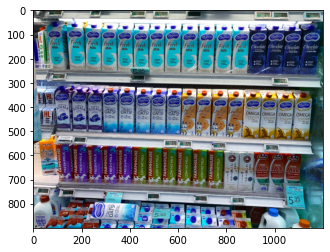

In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
test_img = cv2.imread(test_image)
plt.imshow(test_img)

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.imshow(result_list[0][0])
plt.show()

UsageError: Line magic function `%` not found.


In [9]:
import json
import pandas as pd
import numpy as np

import os
import joblib
# from .variables import old_ocr_req_cols
# from .skew_correction import  PageSkewWraper

const_HW = 1.294117647
const_W = 600


def bucket_sort(df, colmn, ymax_col='ymax', ymin_col='ymin'):
    df['line_number'] = 0
    colmn.append('line_number')
    array_value = df[colmn].values
    start_index = Line_counter = counter = 0
    ymax, ymin, line_no = colmn.index(ymax_col), colmn.index(
        ymin_col), colmn.index('line_number')
    while counter < len(array_value):
        current_ymax = array_value[start_index][ymax]
        for next_index in range(start_index, len(array_value)):
            counter += 1

            next_ymin = array_value[next_index][ymin]
            next_ymax = array_value[next_index][ymax]
            if current_ymax > next_ymin:

                array_value[next_index][line_no] = Line_counter + 1
#                 if current_ymax < next_ymax:

#                     current_ymax = next_ymax
            else:
                counter -= 1
                break
        # print(counter, len(array_value), start_index)
        start_index = counter
        Line_counter += 1
    return pd.DataFrame(array_value, columns=colmn)


def do_sorting(df):
    df.sort_values(['ymin', 'xmin'], ascending=True, inplace=True)
    df['idx'] = df.index
    if 'line_number' in df.columns:
        print('line number removed')
        df.drop('line_number', axis=1, inplace=True)
    req_colns = ['xmin', 'ymin', 'xmax', 'ymax', 'idx']
    temp_df = df.copy()
    temp = bucket_sort(temp_df.copy(), req_colns)
    df = df.merge(temp[['idx', 'line_number']], on='idx')
    df.sort_values(['line_number', 'xmin'], ascending=True, inplace=True)
    df = df.reset_index(drop=True)
    df = df.reset_index(drop=True)
    return df



In [10]:
import pandas as pd
bb_df = pd.DataFrame(result_list[0][1].tolist(), columns =["xmin","ymin", "xmax", "ymax", "conf", "cls"])

In [11]:
sorted_df = do_sorting(bb_df)

In [12]:
sorted_df.line_number.value_counts()

1.0    16
3.0    11
2.0     8
Name: line_number, dtype: int64

In [13]:
names[32], names[8], names[36], names[41], names[23],   names[24]

('Packet,MAGNOLIA FRESH MILK 1L FNDM',
 'Packet,F:M MAGNOLIA CHOC 1L',
 'Packet,MAG KURMA MILK 1L',
 'Packet,FM MAG LFHC OAT 1L',
 'Packet,FARMHOUSE FRESH MILK 1L FNDM',
 'Packet,FARMHOUSE PLAIN LF 1L')

In [14]:
# First row
# 32 x 12 Packet,MAGNOLIA FRESH MILK 1L FNDM
# 8 x 4 Packet,F:M MAGNOLIA CHOC 1L

# second row
# 36 x 1 Packet,MAG KURMA MILK 1L
# 41 x 6 Packet,FM MAG LFHC OAT 1L
# 50 x 4
# 51 x 3 
# 52 x 2 

# third row
# 23 x 5 Packet,FARMHOUSE FRESH MILK 1L FNDM
# 24 x 6 Packet,FARMHOUSE PLAIN LF 1L
# 54 x 5

n_rows = 3
n_cols = 16
master_table = np.zeros((n_rows, n_cols))
# master_text_table = master_table
#  in UI when a row number and column number is enetered 
#  give space for entering teh product anhd its count in each rows in the corerct order
# this can be a dropdown with search feature and we do lookup from names to find the ID
master_annotations = [[(32, 12), (8, 4)], [(36, 1), (41, 6), (50, 4), (51, 3), (52, 2)], [(23, 5), (24, 6), (54,5)]]
# master_text_annotations = [[(32, 12), (8, 4)], [(36, 1), (41, 6), (50, 4), (51, 3), (52, 2)], [(23, 5), (24, 6), (54,5)]]
for i, row in enumerate(master_annotations):
    idx = 0
    for product, count in row:
        master_table[i, idx:idx+count] = product
        idx = idx + count

import numpy as np
print("master planogram")
print(np.matrix(master_table))

master planogram
[[         32          32          32          32          32          32          32          32          32          32          32          32           8           8           8           8]
 [         36          41          41          41          41          41          41          50          50          50          50          51          51          51          52          52]
 [         23          23          23          23          23          24          24          24          24          24          24          54          54          54          54          54]]


In [15]:
detected_table = np.zeros((n_rows, n_cols)) + 100
for i, row  in sorted_df.groupby('line_number'):
    # print(f"Adding products in the row {i} to the detected planogram", row.cls.tolist())
    products  =row.cls.tolist()
    detected_table[int(i-1), 0:len(products)] = products
detected_table.shape
print("Detected planogram")
print(np.matrix(detected_table))

Detected planogram
[[         32          32          32          32          32          32          32          32          32          32          32          32           8           8           8           8]
 [         36          36          36          41          41          41          41          41         100         100         100         100         100         100         100         100]
 [         23          23          23          23          23          24          24          24          24          24          24         100         100         100         100         100]]


In [16]:
(master_table == detected_table).all()


False

In [17]:
non_null_product = 101
(master_table == detected_table).sum() / (master_table != non_null_product).sum()

0.6666666666666666

In [18]:
32/ 48

0.6666666666666666

In [19]:
40/48

0.8333333333333334

In [20]:
(master_table == detected_table).any()

True

In [21]:
names.index('Packet,PURA FRESH MILK 1L FS'), names.index('Packet,MAG OMEGA PLUS PLAIN 200ML')

(25, 34)

In [22]:
sorted_df

xmin   ymin    xmax   ymax      conf   cls  idx  line_number
0     57.0   44.0   136.0  246.0  0.900506  32.0   19          1.0
1    135.0   43.0   218.0  246.0  0.903687  32.0   17          1.0
2    211.0   47.0   286.0  246.0  0.910026  32.0    7          1.0
3    278.0   50.0   351.0  249.0  0.900455  32.0   20          1.0
4    343.0   53.0   417.0  247.0  0.909262  32.0    9          1.0
5    409.0   54.0   483.0  242.0  0.899251  32.0   21          1.0
6    475.0   55.0   548.0  255.0  0.881306  32.0   32          1.0
7    540.0   56.0   617.0  258.0  0.922429  32.0    0          1.0
8    608.0   56.0   686.0  258.0  0.908405  32.0   11          1.0
9    678.0   57.0   756.0  261.0  0.920732  32.0    2          1.0
10   748.0   57.0   828.0  263.0  0.921377  32.0    1          1.0
11   819.0   57.0   899.0  263.0  0.906651  32.0   14          1.0
12   887.0   57.0   971.0  267.0  0.904030   8.0   16          1.0
13   961.0   59.0  1041.0  268.0  0.897694   8.0   22          1.0
14  1033.0   59.0  1114.0  267.0  0.906937   8.0   13          1.0
15  1104.0   61.0  1192.0  272.0  0.902772   8.0   18          1.0
16    87.0  306.0   159.0  504.0  0.907925  36.0   12          2.0
17   153.0  309.0   225.0  502.0  0.909513  36.0    8          2.0
18   220.0  312.0   289.0  503.0  0.905550  36.0   15          2.0
19   282.0  314.0   356.0  507.0  0.909124  41.0   10          2.0
20   349.0  314.0   423.0  509.0  0.912001  41.0    5          2.0
21   419.0  315.0   491.0  511.0  0.917821  41.0    3          2.0
22   482.0  317.0   555.0  514.0  0.913040  41.0    4          2.0
23   546.0  319.0   618.0  516.0  0.911265  41.0    6          2.0
24    92.0  549.0   164.0  709.0  0.889730  23.0   25          3.0
25   157.0  549.0   227.0  712.0  0.881745  23.0   31          3.0
26   219.0  552.0   289.0  715.0  0.893254  23.0   23          3.0
27   281.0  555.0   352.0  718.0  0.885784  23.0   28          3.0
28   344.0  559.0   413.0  719.0  0.880544  23.0   33          3.0
29   406.0  561.0   475.0  721.0  0.877126  24.0   34          3.0
30   467.0  562.0   537.0  724.0  0.884722  24.0   29          3.0
31   528.0  567.0   598.0  726.0  0.886900  24.0   27          3.0
32   589.0  570.0   662.0  729.0  0.890682  24.0   24          3.0
33   653.0  573.0   726.0  734.0  0.887247  24.0   26          3.0
34   717.0  575.0   793.0  738.0  0.884721  24.0   30          3.0